<a href="https://colab.research.google.com/github/plarrip/alumnes-api/blob/master/Proyecto_Final_Domestika_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO FINAL
## "Modelo de Machine Learning para diferenciar imágenes hechas por un humano de imágenes generadas con IA."

## Contexto
Usando los conceptos aprendidos en este cursillo, crearemos un modelo de Machine Learning que clasificará cualquier imagen entre "AI-generated" y "Human-generated".  

No solo se trata de un ejercicio ideal para practicar las nuevas técnicas adquiridas, sinó que además es un ejemplo de mucha relevancia dado el contexto de impacto social que están teniendo los modelos generativos como DALL-E y Midjourney,  capaces de representar imágenes a partir de texto. Estos modelos han expandido las capacidades de crear arte de los humanos de la noche a la mañana, pero también suponen un riesgo para la sociedad dada la creciente existencia de fake news como herramienta ideológica que llevamos observando desde hace un par de décadas con la irrupción de las redes sociales.

Además, concretamente los artistas pronto se verán muy afectados por el intrusismo de la IA en su profesión, siendo necesario para estos reservarse un nicho de "producto 100% humano" diferenciándose del contenido de IA. Mezclar ambos productos sería perjudicial para los artistas, y a la larga dismunuiría la calidad del arte para toda la sociedad.

Por lo tanto, herramientas que ayuden a etiquetar con claridad cuándo un contenido (una imagen en este caso) proviene de una IA y cuándo de un humano ayudarán sin duda a que el desarrollo de IAs generativas sólo aporten beneficios, minimizando su impacto negativo en la sociedad.

## Cómo entrenaremos el modelo
Para entrenar el modelo importaremos dos carpetas con aproximadamente **435 imágenes** cada una de dos tipos: **arte creado por IA; y arte creado por humanos**. Por arte entendemos pinturas, dibujos, fotografías, etc.  

El origen de este dataset de entrenamiento es Kaggle, y se puede encontrar en este link: https://www.kaggle.com/datasets/cashbowman/ai-generated-images-vs-real-images

## Tipo de modelo escogido
Siguiendo la línea del curso, le sacaremos partido a las **redes neuronales convolucionales (CNNs)** para detectar patrones en las imágenes y entrenar el modelo. Haremos 3 ejercicios en paralelo con distintas metodologías aprendidas en el curso:

a) **Datasets originales**: importaremos los datasets de imágenes tal y como vienen dados, aplicaremos un mínimo de *pre-processing* y entrenaremos el modelo desde 0.

b) **Enhanced data preprocessing**: importaremos los datasets igual, pero antes de entrenar el modelo aplicaremos *Data Augmentation* para incrementar los datasets. A su vez, aplicaremos *Dropout* al modelo para que sea más versátil.

c) **Transfer learning**: finalmente usaremos *Transfer Learning* para sacarle provecho a algùn modelo potente de Internet ya entrenado, adaptándolo a nuestro dataset y objetivos.

Al final compararemos los resultados de los 3 caminos y sacaremos conclusiones.

Al turrón!!

#+++++++++++++++++++++++++++++

##1- Importando datasets
Tenemos dos carpetas guardadas en Drive que vamos a cargar para entrenar el modelo. Lo primero será descomprimir las carpetas:

In [3]:
#descomprimir
!unzip "/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/AiArt.zip" -d "/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/AiArt"

unzip:  cannot find or open /content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/AiArt.zip, /content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/AiArt.zip.zip or /content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/AiArt.zip.ZIP.


In [4]:
!unzip "/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/RealArt.zip" -d "/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/RealArt"

unzip:  cannot find or open /content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/RealArt.zip, /content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/RealArt.zip.zip or /content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/RealArt.zip.ZIP.


In [5]:
#Crear un dataset (no en memoria)
!mkdir "/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/dataset"
!cp -r "/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/AiArt" "/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/dataset"
!cp -r "/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/RealArt" "/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/dataset"

mkdir: cannot create directory ‘/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/dataset’: File exists
cp: cannot stat '/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/AiArt': No such file or directory
cp: cannot stat '/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/RealArt': No such file or directory


In [6]:
#eliminar carpetas comprimidas
!rm -rf  "/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/AiArt.zip"
!rm -rf  "/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/RealArt.zip"

Con las imágenes organizadas en sus respectivas carpetas, procederemos a editarlas para que encajen con el modelo.

# a) MÉTODO 1: DATASETS ORIGINALES

##2- Preprocesamiento del dataset

Para optimizar el procesamiento y resultado del modelo haremos el siguiente ejercicio de formateo de las imágenes:
- Normalizar valores de píxeles de 0 a 1.
- Ajustar tamaño a 224x224.
- Cambiar color a blanco y negro.

In [1]:
#Preprocesamiento de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generator
datagen = ImageDataGenerator(
    rescale=1./255,               # Normalizar valores de 0 a 1.
    validation_split = 0.2
)

path = "/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/dataset"

data_gen_train = datagen.flow_from_directory(path,
                                             target_size=(224,224),         # Ajustar tamaño a 224x224
                                             batch_size=32,
                                             shuffle=True,
                                             color_mode='grayscale',        # Cambiar color a blanco y negro
                                             subset='training',
                                             class_mode='sparse')

data_gen_val = datagen.flow_from_directory(path,
                                             target_size=(224,224),
                                             batch_size=32,
                                             shuffle=True,
                                             color_mode='grayscale',
                                             subset='validation',
                                             class_mode='sparse')

Found 686 images belonging to 2 classes.
Found 170 images belonging to 2 classes.


Veamos muestras de cómo quedarán las imágenes después de este preprocesamiento.

Batch shape - Images: (32, 224, 224, 1)
Batch shape - Labels: (32,)
Class indices: {'AiArt': 0, 'RealArt': 1}


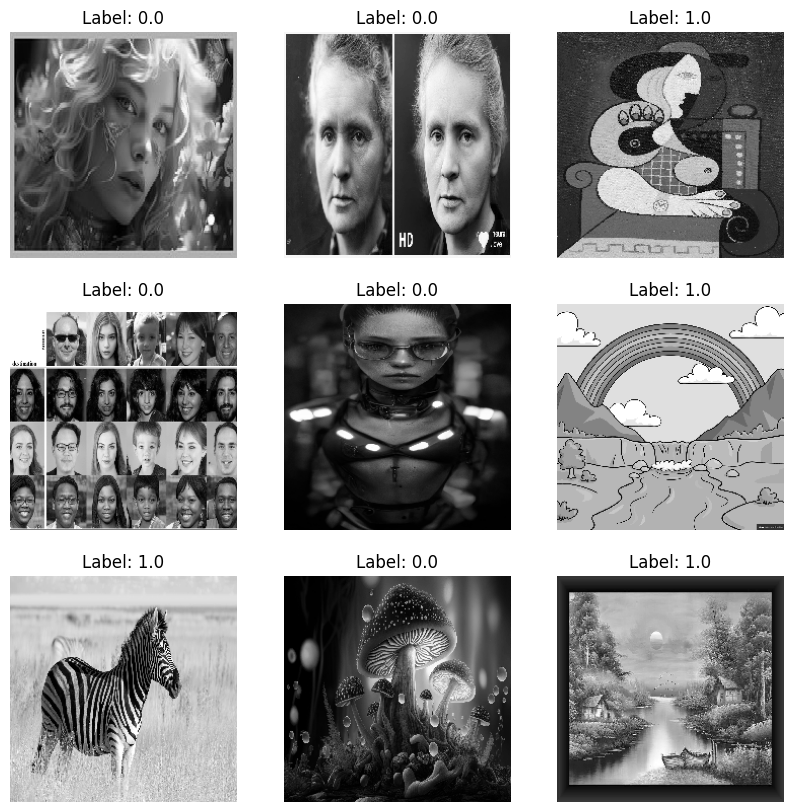

In [8]:
import matplotlib.pyplot as plt

# Get a batch of data from the generator
batch_images, batch_labels = next(data_gen_train)

# Print the shape of the batch
print("Batch shape - Images:", batch_images.shape)
print("Batch shape - Labels:", batch_labels.shape)

# Print the class indices of the batch
print("Class indices:", data_gen_train.class_indices)

# Plot the first few images in the batch
plt.figure(figsize=(10, 10))
for i in range(min(9, batch_images.shape[0])):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch_images[i, :, :, 0], cmap='gray')
    plt.title(f"Label: {batch_labels[i]}")
    plt.axis("off")

plt.show()


##3- Diseño y entrenamiento del modelo

Ahora que ya tenemos los datasets de imágenes preprocesados para el training y la validation, empezaremos por diseñar la estructura del modelo, luego la compilaremos (con hiperparámetros), para finalmente entrenar el modelo con las imágenes.

In [9]:
import tensorflow as tf
modelo = tf.keras.models.Sequential([
    #convolutional + grouping layers (input)
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(224, 224, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #flattening layer
    tf.keras.layers.Flatten(),
    #hidden dense layer
    tf.keras.layers.Dense(100, activation='relu'),

    #classification neuron (output)
    tf.keras.layers.Dense(2, activation='softmax')
])

Acto seguido vamos a compilar el diseño del modelo con hiperparámetros para optimizarlo:

In [10]:
modelo.compile(
    optimizer='adam', #try 'nadam' too
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), #le permite al modelo ajustarse en casos de clasificacion multiple
    metrics=['accuracy']
)

El modelo ya está listo para ser entrenado.

In [11]:
history = modelo.fit(
    data_gen_train,
    epochs=10,
    steps_per_epoch = len(data_gen_train),
    validation_data=data_gen_val,
    validation_steps=len(data_gen_val),
    verbose=2
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/22 - 372s - loss: 0.9054 - accuracy: 0.5138 - val_loss: 0.6919 - val_accuracy: 0.5765 - 372s/epoch - 17s/step
Epoch 2/10
22/22 - 25s - loss: 0.6848 - accuracy: 0.5662 - val_loss: 0.6534 - val_accuracy: 0.5941 - 25s/epoch - 1s/step
Epoch 3/10
22/22 - 25s - loss: 0.6467 - accuracy: 0.6288 - val_loss: 0.6430 - val_accuracy: 0.6059 - 25s/epoch - 1s/step
Epoch 4/10
22/22 - 25s - loss: 0.6022 - accuracy: 0.6812 - val_loss: 0.6684 - val_accuracy: 0.5882 - 25s/epoch - 1s/step
Epoch 5/10
22/22 - 24s - loss: 0.5473 - accuracy: 0.7249 - val_loss: 0.6875 - val_accuracy: 0.5882 - 24s/epoch - 1s/step
Epoch 6/10
22/22 - 25s - loss: 0.4364 - accuracy: 0.8093 - val_loss: 0.7518 - val_accuracy: 0.6529 - 25s/epoch - 1s/step
Epoch 7/10
22/22 - 25s - loss: 0.3817 - accuracy: 0.8224 - val_loss: 0.7736 - val_accuracy: 0.6176 - 25s/epoch - 1s/step
Epoch 8/10
22/22 - 26s - loss: 0.2798 - accuracy: 0.8923 - val_loss: 1.1055 - val_accuracy: 0.5824 - 26s/epoch - 1s/step
Epoch 9/10
22/22 - 25s - loss: 0.1937 - 

## 4- Evaluación del modelo

Veamos como aprende el modelo según el progreso del ajuste y la precisión.

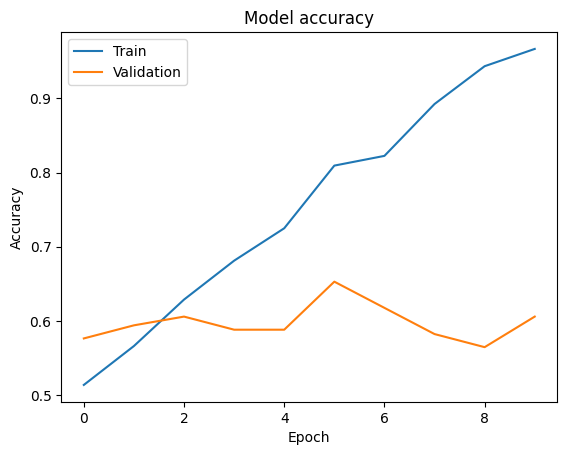

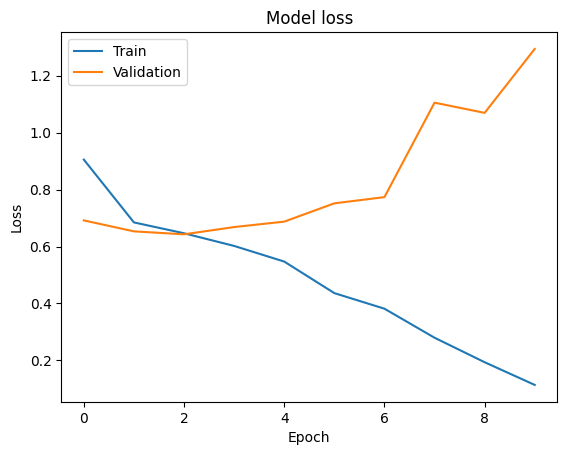

In [12]:
# Optionally, you can plot the training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Como podemos ver, el modelo con el training set nunca deja de aprender y minimizar el loss value; sin embargo el validation set muestra como el modelo es incapaz de mejorar su 'accuracy' por encima del 65%, revelando que el modelo sufre de mucho 'overfitting'.

Para mejorar estas métricas, volvamos unos pasos atrás e implementemos técnicas para mejorar la 'accuracy' ('Data Augmentation') a la vez que combatimos el 'overfitting' ('Dropout').

# b) MÉTODO 2: ENHANCED DATA PREPROCESSING
Volveremos atrás y retomaremos el proyecto justo después de haber importado los datasets. Justo cuando usamos el módulo ImageDataGenerator para hacer la normalización de las imágenes, incluiremos los parámetros de Data Augmentation:

##2- Preprocesamiento del dataset

In [8]:
#Preprocesamiento de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generator
datagen = ImageDataGenerator(
    rescale=1./255,               # Normalizar valores de 0 a 1.
    rotation_range = 10,          # Parametros para Data Augmentation:
    width_shift_range = 0.15,     # {
    height_shift_range = 0.15,
    shear_range = 5,
    zoom_range = [0.7, 1.3],      # }
    validation_split = 0.2
)

path = "/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/dataset"

data_gen_train = datagen.flow_from_directory(path,
                                             target_size=(224,224),         # Ajustar tamaño a 224x224
                                             batch_size=32,
                                             shuffle=True,
                                             color_mode='grayscale',        # Cambiar color a blanco y negro
                                             subset='training',
                                             class_mode='sparse')

data_gen_val = datagen.flow_from_directory(path,
                                             target_size=(224,224),
                                             batch_size=32,
                                             shuffle=True,
                                             color_mode='grayscale',
                                             subset='validation',
                                             class_mode='sparse')

Found 686 images belonging to 2 classes.
Found 170 images belonging to 2 classes.


Veamos como ha quedado el dataset después del Data Augmentation:

In [4]:
import matplotlib.pyplot as plt

# Get a batch of data from the generator
batch_images, batch_labels = next(data_gen_train)

# Print the shape of the batch
print("Batch shape - Images:", batch_images.shape)
print("Batch shape - Labels:", batch_labels.shape)

# Print the class indices of the batch
print("Class indices:", data_gen_train.class_indices)

# Plot the first few images in the batch
plt.figure(figsize=(10, 10))
for i in range(min(9, batch_images.shape[0])):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch_images[i, :, :, 0], cmap='gray')
    plt.title(f"Label: {batch_labels[i]}")
    plt.axis("off")

plt.show()

KeyboardInterrupt: 

Vemos claramente como algunas imágenes se entrecortan, rotan, etc. Esto ha aumentado el número de imágenes disponibles para entrenar el modelo. Aunque no tenemos visibilidad del tamaño final del dataset, se estima que se haya multiplicado por 5 desde el original.

##3- Diseño y entrenamiento del modelo

Anteriormente ya habíamos diseñado la estructura del modelo, por lo que podemos aprovecharlo y pasar a compilar/entrenar el modelo directamente. La única modificación es la incorporación de una layer después de la Dense Layer que aplica el dropout:

In [9]:
import tensorflow as tf
modelo = tf.keras.models.Sequential([
    #convolutional + grouping layers (input)
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(224, 224, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #flattening layer
    tf.keras.layers.Flatten(),
    #hidden dense layer
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),       #trying with Dropout active this time

    #classification neuron (output)
    tf.keras.layers.Dense(2, activation='softmax')
])

In [10]:
modelo.compile(
    optimizer='adam', #would be useful in this case to use 'nadam' optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), #le permite al modelo ajustarse en casos de clasificacion multiple
    metrics=['accuracy']
)

In [11]:
history = modelo.fit(
    data_gen_train,
    epochs=10,
    steps_per_epoch = len(data_gen_train),
    validation_data=data_gen_val,
    validation_steps=len(data_gen_val),
    verbose=2
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/22 - 193s - loss: 0.8305 - accuracy: 0.5321 - val_loss: 0.6721 - val_accuracy: 0.5588 - 193s/epoch - 9s/step
Epoch 2/10
22/22 - 28s - loss: 0.6928 - accuracy: 0.5539 - val_loss: 0.6892 - val_accuracy: 0.5941 - 28s/epoch - 1s/step
Epoch 3/10
22/22 - 27s - loss: 0.6852 - accuracy: 0.5802 - val_loss: 0.6657 - val_accuracy: 0.5941 - 27s/epoch - 1s/step
Epoch 4/10
22/22 - 28s - loss: 0.6798 - accuracy: 0.5875 - val_loss: 0.6574 - val_accuracy: 0.6353 - 28s/epoch - 1s/step
Epoch 5/10
22/22 - 27s - loss: 0.6751 - accuracy: 0.6079 - val_loss: 0.6506 - val_accuracy: 0.6118 - 27s/epoch - 1s/step
Epoch 6/10
22/22 - 27s - loss: 0.6523 - accuracy: 0.6414 - val_loss: 0.6385 - val_accuracy: 0.6471 - 27s/epoch - 1s/step
Epoch 7/10
22/22 - 27s - loss: 0.6459 - accuracy: 0.6239 - val_loss: 0.6311 - val_accuracy: 0.6353 - 27s/epoch - 1s/step
Epoch 8/10
22/22 - 28s - loss: 0.6610 - accuracy: 0.6050 - val_loss: 0.6670 - val_accuracy: 0.5588 - 28s/epoch - 1s/step
Epoch 9/10
22/22 - 28s - loss: 0.6589 - a

## 4- Evaluación del modelo

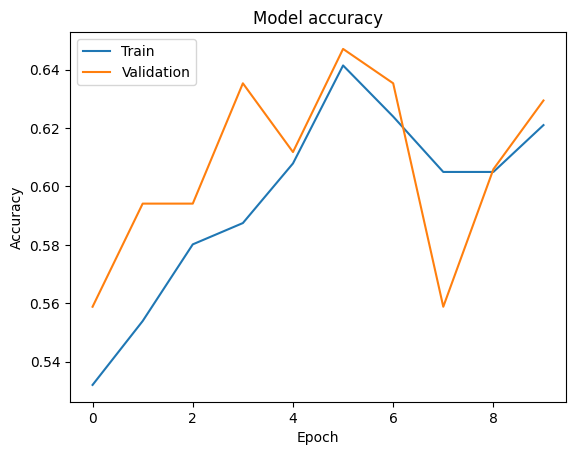

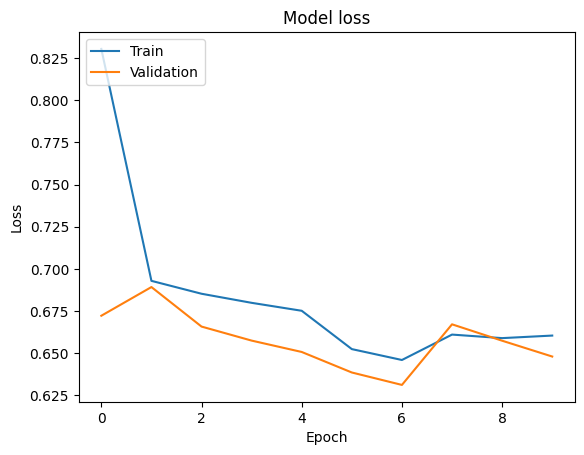

In [12]:
# Optionally, you can plot the training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observamos como los resultados del entrenamiento ahora son muy distintos. Por una parte el dataset de entrenamiento da una 'accuracy' y 'value loss' mucho peores, reduciendo asi el overfitting que sufría antes. Por otro lado, los resultados del 'validation dataset' llegan a ser un 2% mejores. En cualquier caso, el modelo sigue sigue siendo poco útil. Veamos si podemos usar un modelo pre-entrenado como base para entrenar el nuestro, mediante la técnica de Transfer Learning.

# c) MÉTODO 3: TRANSFER LEARNING

##2- Preprocesamiento del dataset

Para optimizar el procesamiento y resultado del modelo haremos el siguiente ejercicio de formateo de las imágenes:
- Normalizar valores de píxeles de 0 a 1.
- Ajustar tamaño a 224x224.
- Esta vez mantendremos 3 canales de color (RGB) para adaptarnos al modelo pre-entrenado.

In [5]:
#Preprocesamiento de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generator
datagen = ImageDataGenerator(
    rescale=1./255,               # Normalizar valores de 0 a 1.
    validation_split = 0.2
)

path = "/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/dataset"

data_gen_train = datagen.flow_from_directory(path,
                                             target_size=(224,224),         # Ajustar tamaño a 224x224
                                             batch_size=32,
                                             shuffle=True,
                                             color_mode='rgb',        # Mantiene las imagenes a color
                                             subset='training',
                                             class_mode='sparse')

data_gen_val = datagen.flow_from_directory(path,
                                             target_size=(224,224),
                                             batch_size=32,
                                             shuffle=True,
                                             color_mode='rgb',
                                             subset='validation',
                                             class_mode='sparse')

Found 686 images belonging to 2 classes.
Found 170 images belonging to 2 classes.


## - (Preparando el modelo pre-entrendado)

In [17]:
# Si fuera el caso, necesitariamos instalar la API de Kaggle en nuestro entorno (Colab ya lo incluye)
# !pip install kaggle
# Tambien necesitamos subir el token API de Kaggle a Colab (subido manualmente a Drive) y moverlo al directorio correcto
!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/Paul/Software/API keys/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  #change the permissions of the file
!pwd # checking the present working directory

/content


In [31]:
# Podemos explorar los modelos existentes en Kaggle a traves de la API
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.model_list_cli()

Next Page Token = CfDJ8CYusWan8yNKiDQcrMXOtQFZ5RAl-NyhKoOAQPXrE8-5Q1R7XBMkseu5uFc9vwcovtHvGB6pUxWTIWeYfoO1Jg8
   id  ref                                       title                         subtitle                                                                                                                                                author         
-----  ----------------------------------------  ----------------------------  ------------------------------------------------------------------------------------------------------------------------------------------------------  -------------  
 3301  google/gemma                              Gemma                         Gemma is a family of lightweight, open models built from the research and technology that Google used to create the Gemini models.                      Google         
 3533  keras/gemma                               Gemma                         Keras implementation of the Gemma model. This Keras 3 implementation w

Buscamos uno que nos puede interesar: 'Imagenet V2':

In [32]:
api.model_list_cli(search="efficientnet")

   id  ref                                   title                         subtitle                                                                                                                                                                            author          
-----  ------------------------------------  ----------------------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------------  
 2797  keras/efficientnetv2                  EfficientNetV2                Instantiates the EfficientNetV2 architecture.                                                                                                                                       Keras           
  319  google/bird-vocalization-classifier   bird-vocalization-classifier  Google Bird Vocalization Classifier: 
A global bird embedding and classification model.                      

In [34]:
# Descargando el modelo pre-entrenado con la API de Kaggle
!kaggle kernels output google/efficientnet-v2 -p /content/pretrained_model

404 - Not Found - Not found


Este modelo no esta disponible para su descarga mediante la API de Kaggle. Probemos otra via:

In [6]:
# Usamos el modulo 'hub' de Tensorflow para importar el modelo directamente de la URL
import tensorflow as tf
import tensorflow_hub as hub

#descargamos la version 'feature vector'; ignoramos por tanto la ultima layer de clasificacion
url = "https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet21k-b0-feature-vector/1"
efficientnetv2 = hub.KerasLayer(url, input_shape=(224,224,3), trainable = False) # Congelamos el modelo para que no se pueda entrenar

In [12]:
#comparamos el numero de weights que contiene el modelo pre-entrenado:
print('Total weights: ',len(efficientnetv2.weights))
print('Trainable: ', len(efficientnetv2.trainable_weights))
print('Non trainable: ', len(efficientnetv2.non_trainable_weights))

Total weights:  359
Trainable:  0
Non trainable:  359


This confirms that the pre-trained model we've imported is actually frozen.  
Ya tenemos el modelo pre-entrenado guardado en la variable 'efficientnetv2'. Ejecutemos el Transfer Learning:

##3- Diseño y entrenamiento del modelo

In [7]:
#DISEÑAMOS LA ARQUITECTURA DEL MODELO
modelo = tf.keras.Sequential([
    efficientnetv2,   #pre-trained model
    tf.keras.layers.Dense(2, activation='softmax')    #our classification neuron (output)
])

#COMPILAMOS EL MODELO
modelo.compile(
    optimizer='adam', #would be useful in this case to use 'nadam' optimizer
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), #le permite al modelo ajustarse en casos de clasificacion multiple
    metrics=['accuracy']
)

#ENTRENAMOS EL MODELO
history = modelo.fit(
    data_gen_train,
    epochs=10,
    steps_per_epoch = len(data_gen_train),
    validation_data=data_gen_val,
    validation_steps=len(data_gen_val),
    verbose=2
)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10
22/22 - 385s - loss: 0.8768 - accuracy: 0.6458 - val_loss: 0.7374 - val_accuracy: 0.6706 - 385s/epoch - 18s/step
Epoch 2/10
22/22 - 24s - loss: 0.5290 - accuracy: 0.7741 - val_loss: 0.6197 - val_accuracy: 0.7235 - 24s/epoch - 1s/step
Epoch 3/10
22/22 - 25s - loss: 0.4234 - accuracy: 0.8353 - val_loss: 0.6333 - val_accuracy: 0.7235 - 25s/epoch - 1s/step
Epoch 4/10
22/22 - 24s - loss: 0.3671 - accuracy: 0.8586 - val_loss: 0.5732 - val_accuracy: 0.7471 - 24s/epoch - 1s/step
Epoch 5/10
22/22 - 24s - loss: 0.3010 - accuracy: 0.8776 - val_loss: 0.5814 - val_accuracy: 0.7588 - 24s/epoch - 1s/step
Epoch 6/10
22/22 - 25s - loss: 0.2661 - accuracy: 0.9023 - val_loss: 0.6018 - val_accuracy: 0.7353 - 25s/epoch - 1s/step
Epoch 7/10
22/22 - 26s - loss: 0.2372 - accuracy: 0.9125 - val_loss: 0.5747 - val_accuracy: 0.7529 - 26s/epoch - 1s/step
Epoch 8/10
22/22 - 23s - loss: 0.2195 - accuracy: 0.9198 - val_loss: 0.5933 - val_accuracy: 0.7412 - 23s/epoch - 1s/step
Epoch 9/10
22/22 - 24s - loss

In [10]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              5919312   
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 5921874 (22.59 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


## 4- Evaluación del modelo

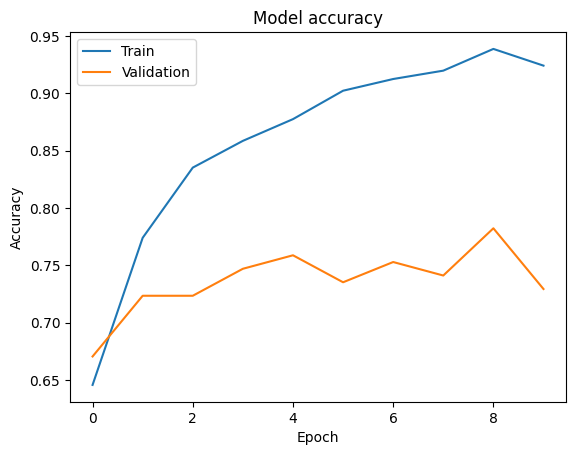

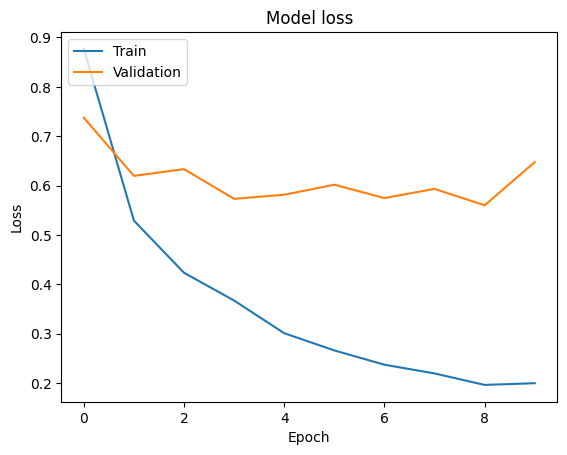

In [9]:
# Optionally, you can plot the training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Como podemos ver, el modelo en su primera epoch ya empieza en 65% de accuracy. Con los métodos anteriores empezaba alrededor del 50%. Esto se debe al poder que aporta el modelo pre-entrenado que hemos escogido (EfficientNetV2). El valor final de la accuracy (validation dataset) es de 72,9% (con un pico de 78%).  
  

Entonces el modelo ya está listo en nuestro environment para ser usado.

#5- Puesta en producción: predicciones con el modelo

Ahora que el modelo ya está evaluado y tenemos suficiente confianza en él ya podríamos implementarlo en algún caso de uso real. Empezaremos por guardar el modelo en un archivo que podremos usar siempre que queramos hacer predicciones con el modelo. De otro modo se borrarían los parámetros que hemos automatizado cada vez que cerrásemos la sesión de esta Notebook.

In [11]:
modelo.save('/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/modelo_3')

Ahora simulemos la importación del modelo que hemos guardado, y veamos como clasifica nuevas imágenes:

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
from keras.preprocessing import image
import os

# importando el modelo entrenado
modelo = tf.keras.models.load_model('/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/modelo_1')

# directorio con imágenes Test
folder_path = '/content/drive/MyDrive/Paul/Formacions/Numbers/CODING/Domestika - AI with Python/9. Final Project/Predictions'

# Function to categorize images and make predictions
def categorizar(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            # Load the image
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).convert('L')  # Convert to grayscale
            img = img.resize((224, 224))  # Resize the image
            img_array = np.array(img) / 255.0  # Convert to array and normalize
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

            # Make predictions
            prediction = modelo.predict(img_array)
            predicted_label = np.argmax(prediction)

            # Display the image and predicted label
            display(img)
            if predicted_label == 0:
              print('Predicted Label for', filename + ': AiArt')
            elif predicted_label == 1:
              print('Predicted Label for', filename + ': RealArt')


1/1 [==============================] - 1s 517ms/step


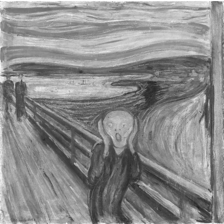

Predicted Label for RealArt_7.png: RealArt
1/1 [==============================] - 0s 21ms/step


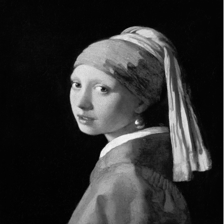

Predicted Label for RealArt_8.png: RealArt
1/1 [==============================] - 0s 19ms/step


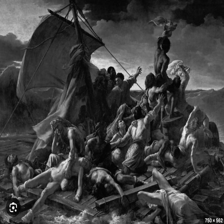

Predicted Label for RealArt_9.png: AiArt
1/1 [==============================] - 0s 21ms/step


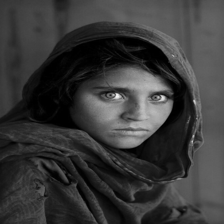

Predicted Label for RealArt_10.png: RealArt
1/1 [==============================] - 0s 19ms/step


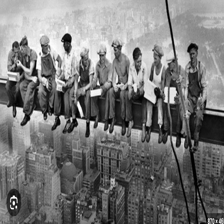

Predicted Label for RealArt_11.png: AiArt
1/1 [==============================] - 0s 21ms/step


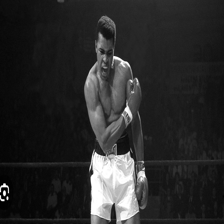

Predicted Label for RealArt_12.png: RealArt
1/1 [==============================] - 0s 30ms/step


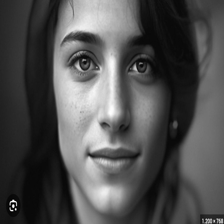

Predicted Label for AiArt_7.png: AiArt
1/1 [==============================] - 0s 17ms/step


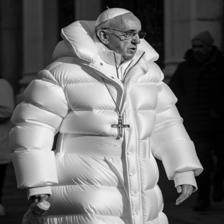

Predicted Label for AiArt_8.png: RealArt
1/1 [==============================] - 0s 19ms/step


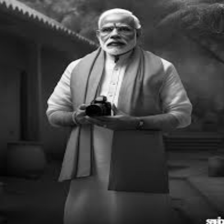

Predicted Label for AiArt_9.png: AiArt
1/1 [==============================] - 0s 19ms/step


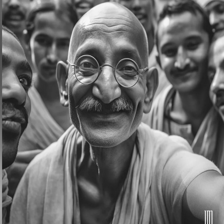

Predicted Label for AiArt_10.png: AiArt
1/1 [==============================] - 0s 108ms/step


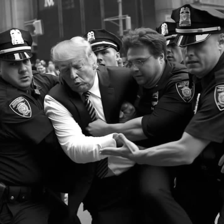

Predicted Label for AiArt_11.png: AiArt
1/1 [==============================] - 0s 20ms/step


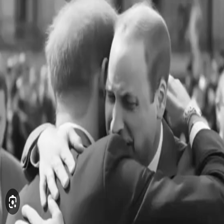

Predicted Label for AiArt_12.png: AiArt


In [13]:
prediccion = categorizar(folder_path)

# Conclusiones
En general parece que haber escogido un modelo CNN ha sido un acierto; para tareas de Computer Vision sigue siendo la mejor opción.  
  
Tras probar 3 métodos de entrenamiento (datasets originales; data augmentation+dropout; transfer learning), no hay duda de que el más efectivo es Transfer Learning. No es sorprendente, teniendo en cuenta que hemos aprovechado el poder del modelo de Keras EfficientNetV2, el cual tiene más de 5 millones de parámetros entrenados. La capa que le hemos puesto por encima apenas tiene 2000.
  

Los resultados que hemos obtenido con el modelo (versión 3) no defraudan: ha clasificado correctamente 9 imágenes de 12. De hecho, en el grupo de imágenes AIArt del test dataset sólo ha fallado una. El modelo podría ser optimizado mucho más aún si invirtiéramos tiempo en probar cambios en los hiperparámetros, funciones de activaciones, optimizadores, etc.


Sin embargo, tal y como está el modelo, ya lo podríamos usar para detectar arte hecho por IA, por ejemplo como filtro de imágenes generadas por IA en concursos de fotografía/arte. No sería tan fiable como para descalificar propuestas, pero sí para hacer una primera clasificación automática para luego estudiar cada detección manualmente por un humano.

# Bibliography:
- EfficientNetV2 official site: https://keras.io/guides/transfer_learning/
- Wonderful use case of Sking Cancer Classification: https://www.kaggle.com/code/matthewjansen/transfer-learning-skin-cancer-classification#4-|-Transfer-Learning-Model:-EfficientNet-V2-B0